In [1]:
#coding: UTF-8

#ベクトル化手法
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#どんなクラスタリングになったか、棒グラフ出力
import matplotlib.pyplot as plt

#x-means、k-means++使用
import pyclustering
from pyclustering.cluster import xmeans

f = open('tms_to_python_内視鏡.txt','r')

#空白で単語を区切り、改行で文書を区切っているテキストデータ
#１文書ずつ、単語に分割してリストに入れていく[([単語1,単語2,単語3],文書id),...]こんなイメージ
#words：文書に含まれる単語のリスト（単語の重複あり）
# tags：文書の識別子（リストで指定．1つの文書に複数のタグを付与できる）
trainings = [TaggedDocument(words = data.split(),tags = [i]) for i,data in enumerate(f)]

In [2]:
# トレーニング
m = Doc2Vec(documents= trainings, dm = 1, size=300, window=8, min_count=30, workers=4)

# モデルのセーブ
m.save("doc2vec_内視鏡.model")

C:\Users\4525\AppData\Local\Continuum\anaconda3\envs\word2vec\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


[1, 2, 6, 7, 8, 12, 23, 24, 27, 31, 36, 39, 42, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 58, 60, 61, 63, 67, 69, 70, 71, 75, 76, 78, 80, 81, 82, 86, 87, 90, 92, 93, 95, 96, 99, 100, 101, 104, 108, 109, 111, 114, 120, 121, 123, 126, 128, 130, 131, 134, 135, 137, 138, 139, 141, 149, 152, 154, 156, 157, 159, 162, 164, 165, 167, 168, 169, 170, 176, 177, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 206, 208, 212, 214, 216, 218, 219, 221, 222, 224, 225, 227, 228, 241, 245, 246, 247, 252, 254, 256, 263, 265, 267, 268, 269, 270, 272, 275, 276, 278, 282, 283, 284, 288, 289, 291, 292, 293, 295, 297, 298, 299, 300, 301, 302, 304, 305, 309, 312, 313, 315, 316, 317, 320, 323, 324, 327, 331, 332, 336, 338, 339, 346, 347, 348, 349, 352, 354, 355, 356, 362, 364, 365, 367, 368, 370, 371, 372, 374, 378, 379, 380, 381, 383, 386, 389, 392, 393, 394, 397, 398, 399, 400, 401, 402, 404, 405, 406, 409, 411, 412, 414, 417, 420, 421, 422, 424, 425, 426, 427, 428, 429, 431, 432, 435,

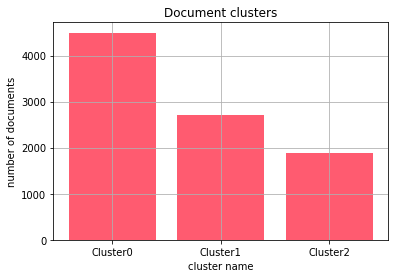

In [3]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.cluster import KMeans
import sys
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


#モデルを読み込む
#モデルは絶対パスで指定してください
m = Doc2Vec.load('doc2vec_内視鏡.model')

#ベクトルをリストに格納
vectors_list=[m.docvecs[n] for n in range(len(m.docvecs))]

#ドキュメント番号のリスト
doc_nums=range(1,1+len(m.docvecs))

#クラスタリング設定
#クラスター数を変えたい場合はn_clustersを変えてください
n_clusters = 3
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=1, n_jobs=-1)

#クラスタリング実行
kmeans_model.fit(vectors_list)

#クラスタリングデータにラベル付け
labels=kmeans_model.labels_

#ラベルとドキュメント番号の辞書づくり
cluster_to_docs = defaultdict(list)
for cluster_id, doc_num in zip(labels, doc_nums):
    cluster_to_docs[cluster_id].append(doc_num)

#クラスター出力
for docs in cluster_to_docs.values():
    print(docs)

#x軸ラベル
x_label_name = []
for i in range(n_clusters):
    x_label_name.append("Cluster"+str(i))

#x=left ,y=heightデータ. ここではx=クラスター名、y=クラスター内の文書数
left = range(n_clusters)
height = []
for docs in cluster_to_docs.values():
    height.append(len(docs))
print(height,left,x_label_name)

#棒グラフ設定
plt.bar(left,height,color="#FF5B70",tick_label=x_label_name,align="center")
plt.title("Document clusters")
plt.xlabel("cluster name")
plt.ylabel("number of documents")
plt.grid(True)
plt.show()

In [4]:
#BICを使用したx-meansを使用

#k++を使用して初期値を決定、今回は適当にクラスター数を2
initializer = xmeans.kmeans_plusplus_initializer(data=vectors_list, amount_centers=20)
initial_centers = initializer.initialize()
xm = xmeans.xmeans(data=vectors_list, initial_centers=initial_centers)
xm.process()

In [5]:
#実行
clusters = xm.get_clusters()
cluster_2 =[]
for cluster in clusters:
    cluster_2.append(cluster)

#クラスター数の更新
n_clusters = len(cluster_2)
print(n_clusters)

20


[1, 69, 76, 85, 154, 181, 182, 189, 197, 198, 216, 221, 222, 263, 291, 327, 362, 368, 381, 383, 421, 432, 443, 445, 481, 496, 513, 551, 585, 616, 683, 719, 734, 790, 796, 798, 803, 870, 873, 910, 931, 958, 973, 987, 995, 998, 1002, 1084, 1131, 1144, 1166, 1190, 1197, 1234, 1269, 1292, 1298, 1332, 1345, 1360, 1396, 1399, 1408, 1416, 1516, 1518, 1544, 1545, 1577, 1624, 1644, 1679, 1682, 1689, 1698, 1718, 1729, 1738, 1755, 1786, 1791, 1815, 1816, 1828, 1920, 1932, 1944, 1967, 2081, 2095, 2104, 2113, 2117, 2118, 2119, 2200, 2201, 2208, 2226, 2268, 2273, 2297, 2316, 2361, 2363, 2432, 2462, 2466, 2474, 2496, 2501, 2509, 2511, 2521, 2529, 2531, 2542, 2544, 2554, 2563, 2582, 2583, 2597, 2603, 2608, 2609, 2624, 2627, 2659, 2668, 2678, 2694, 2705, 2708, 2727, 2744, 2750, 2761, 2820, 2841, 2847, 2849, 2858, 2897, 2909, 2930, 2955, 2980, 2983, 3036, 3053, 3065, 3163, 3165, 3177, 3188, 3190, 3195, 3215, 3216, 3218, 3227, 3229, 3233, 3248, 3259, 3277, 3304, 3311, 3326, 3343, 3360, 3382, 3388, 3413, 

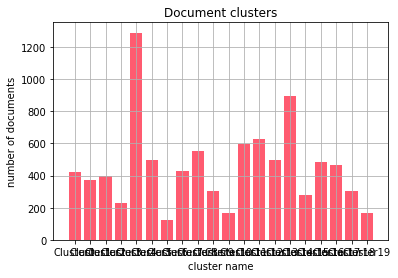

In [6]:
#変更したクラスター数で再度クラスタリング

#ドキュメント番号のリスト
doc_nums=range(1,1+len(m.docvecs))

#クラスタリング設定
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=1, n_jobs=-1)

#クラスタリング実行
kmeans_model.fit(vectors_list)

#クラスタリングデータにラベル付け
labels=kmeans_model.labels_

#ラベルとドキュメント番号の辞書づくり
cluster_to_docs = defaultdict(list)
for cluster_id, doc_num in zip(labels, doc_nums):
    cluster_to_docs[cluster_id].append(doc_num)

#クラスター出力
for docs in cluster_to_docs.values():
    print(docs)

#x軸ラベル
x_label_name = []
for i in range(n_clusters):
    x_label_name.append("Cluster"+str(i))

#x=left ,y=heightデータ. ここではx=クラスター名、y=クラスター内の文書数
left = range(n_clusters)
height = []
for docs in cluster_to_docs.values():
    height.append(len(docs))
print(height,left,x_label_name)

#棒グラフ設定
plt.bar(left,height,color="#FF5B70",tick_label=x_label_name,align="center")
plt.title("Document clusters")
plt.xlabel("cluster name")
plt.ylabel("number of documents")
plt.grid(True)
plt.show()

In [7]:
import os
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta

#CSVファイルの読み込み
read_csv = pd.read_csv("内視鏡_有効_9090.csv",engine='python')

In [8]:
#out_df
datelist = []
datalist = read_csv

#クラスター番号列を末尾に追加
datalist['a'] = labels

#TMS処理後の単語の列を末尾に追加
f = open('tms_to_python_内視鏡.txt')
data1 = f.read()  #ファイル終端まで全て読んだデータを返す
f.close()
lines1 = data1.split('\n') #改行で区切る(改行文字そのものは戻り値のデータには含まれない)
datalist['b'] = lines1

#dfにCSVの情報を格納
df = datalist

#dfの中身を確認
print(df)

        No         出願番号         出願日        公開・公表番号      公開・公表日         登録番号  \
0        1          NaN  2019.03.06  WO2019/172318  2019.09.12          NaN   
1        2          NaN  2019.03.05  WO2019/172231  2019.09.12          NaN   
2        3          NaN  2019.03.04  WO2019/172189  2019.09.12          NaN   
3        4          NaN  2018.12.27  WO2019/171725  2019.09.12          NaN   
4        5          NaN  2018.12.17  WO2019/171703  2019.09.12          NaN   
...    ...          ...         ...            ...         ...          ...   
9085  9086  特願平11-97227  1999.04.05  特開2000-287974  2000.10.17  特許第4274501号   
9086  9087  特願平11-76723  1999.03.19  特開2000-271073  2000.10.03  特許第4464479号   
9087  9088  特願平11-53221  1999.03.01  特開2000-245684  2000.09.12  特許第4264773号   
9088  9089  特願平11-41805  1999.02.19   特開平11-316345  1999.11.16  特許第3635525号   
9089  9090  特願平11-41677  1999.02.19  特開2000-237119  2000.09.05  特許第3514155号   

             登録日                出願人・権利者名           

In [9]:
#列名「クラスター番号」を追加
df.columns = ['No','出願番号','出願日','公開・公表番号','公開・公表日','登録番号','登録日','出願人・権利者名','発明の名称','要約','広報URL','評価情報','クラスター番号','TMS処理後の単語']

#不要な列を削除
df=df.drop(columns=['出願番号','出願日','公開・公表番号','公開・公表日','登録番号','登録日','広報URL','評価情報'])

#「No」列をindex番号として指定
df=df.set_index('No')

#dfの中身を確認
print(df)

                    出願人・権利者名                    発明の名称  \
No                                                      
1      富士フイルム株式会社,出島　工,上田　佳弘  処置具、内視鏡装置、内視鏡システム及び処置方法   
2     富士フイルム株式会社,繁田　典雅,齋藤　孝明      医療画像処理システム及び内視鏡システム   
3             五稜化薬株式会社,吉田　隆志             内視鏡用アプリケータ装置   
4     オリンパス株式会社,籏野　慶佑,比地原　邦彦            内視鏡の先端部および内視鏡   
5       オリンパス株式会社,久保　圭,五十嵐　誠                  内視鏡システム   
...                      ...                      ...   
9086                ＨＯＹＡ株式会社              超音波内視鏡の配管構造   
9087               オリンパス株式会社                      内視鏡   
9088              富士フイルム株式会社              内視鏡の先端硬質部構造   
9089               オリンパス株式会社                  内視鏡システム   
9090              富士フイルム株式会社                    内視鏡装置   

                                                     要約  クラスター番号  \
No                                                                 
1     【要約】処置部位の持ち上げと、病変部位を持ち上げることにより処置対象の部位を視認しやすく露出...       18   
2     【要約】生体情報に関する信頼度が低い領域が存在する場合であっても、生体情報の測定値に対する基..

In [10]:
#out_df
datelist = []
datalist = df

#変更したCSV情報をファイルに出力
datalist.to_csv('doc2vec_内視鏡.csv', encoding='utf_8_sig')